# Predicting Life Satisfaction with NHS Data: Which Lifestyle factors are most important for LS?

Website: https://www.cdc.gov/nchs/nhis/documentation/2023-nhis.html

Dataset: C:\Users\sacar\OneDrive\Documents\Projects\Predicting MH with NHS Data\adult23.csv

Description: 



# Import Packages

In [2]:
#Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import KMeansSMOTE
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import RandomizedSearchCV

# Import Data

In [3]:
#Import data
df = pd.read_csv(r'C:\Users\sacar\OneDrive\Documents\Projects\Predicting MH with NHS Data\adult23.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29522 entries, 0 to 29521
Columns: 647 entries, URBRRL to POVRATTC_A
dtypes: float64(442), int64(204), object(1)
memory usage: 145.7+ MB


In [5]:
df.head(2)

,URBRRL,RATCAT_A,INCTCFLG_A,IMPINCFLG_A,LANGSPECR_A,LANGSOC_A,LANGDOC_A,LANGMED_A,LANGHM_A,PPSU,...,PROXYREL_A,PROXY_A,AVAIL_A,HHSTAT_A,INTV_MON,RECTYPE,IMPNUM_A,WTFA_A,HHX,POVRATTC_A
0,3,4,0,0,NaN,NaN,NaN,NaN,NaN,2,...,NaN,NaN,1,1,1,10,1,7371.139,H029691,1.01
1,4,8,0,0,NaN,NaN,NaN,NaN,NaN,2,...,NaN,NaN,1,1,1,10,1,3146.794,H028812,2.49


# Exploratory Data Analysis

In [6]:
df.shape

(29522, 647)

In [7]:
df.describe()

,URBRRL,RATCAT_A,INCTCFLG_A,IMPINCFLG_A,LANGSPECR_A,LANGSOC_A,LANGDOC_A,LANGMED_A,LANGHM_A,PPSU,...,PHSTAT_A,PROXYREL_A,PROXY_A,AVAIL_A,HHSTAT_A,INTV_MON,RECTYPE,IMPNUM_A,WTFA_A,POVRATTC_A
count,29522.000000,29522.000000,29522.000000,29522.000000,4049.000000,3973.000000,4049.000000,4049.000000,22104.000000,29522.000000,...,29522.000000,537.000000,553.000000,29522.000000,29522.0,29522.000000,29522.0,29522.0,29522.000000,29522.000000
mean,2.317119,9.666757,0.041664,0.373721,1.453445,1.480997,1.301309,1.392937,2.063563,31.375246,...,2.460369,1.286778,1.039783,1.205542,1.0,6.472089,10.0,1.0,8747.291918,4.106340
std,1.061522,4.048065,0.199823,0.712244,0.801351,0.790779,0.631127,0.734160,1.287790,29.253976,...,1.074983,0.668921,0.338166,1.087867,0.0,3.444791,0.0,0.0,5690.650182,2.961649
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,10.0,1.0,1792.441000,0.000000
25%,1.000000,7.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,8.000000,...,2.000000,1.000000,1.000000,1.000000,1.0,3.000000,10.0,1.0,4643.531750,1.800000
50%,2.000000,10.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,24.000000,...,2.000000,1.000000,1.000000,1.000000,1.0,7.000000,10.0,1.0,7374.546000,3.310000
75%,3.000000,14.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,48.000000,...,3.000000,1.000000,1.000000,1.000000,1.0,9.000000,10.0,1.0,10994.809500,5.650000
max,4.000000,14.000000,1.000000,2.000000,9.000000,9.000000,9.000000,9.000000,9.000000,153.000000,...,9.000000,4.000000,8.000000,8.000000,1.0,12.000000,10.0,1.0,39925.600000,11.000000


In [8]:
df_copy = df.copy()

In [9]:
# Check target column and unique values
print(df_copy["LSATIS4_A"].info()) 

print(df_copy["LSATIS4_A"].unique())


<class 'pandas.core.series.Series'>
RangeIndex: 29522 entries, 0 to 29521
Series name: LSATIS4_A
Non-Null Count  Dtype
--------------  -----
29522 non-null  int64
dtypes: int64(1)
memory usage: 230.8 KB
None
[2 1 3 9 4 7]


# Pre-Processing

# Missing Values - Dropping Columns and Rows

In [10]:
# Calculate missing value percentages
missing_percent = df_copy.isnull().sum() / len(df_copy) * 100

# Print summary
print(missing_percent.describe())

count    647.000000
mean      52.059685
std       42.190768
min        0.000000
25%        0.000000
50%       62.421245
75%       93.630174
max      100.000000
dtype: float64


In [11]:
#Check for missing values

# Show all rows
pd.set_option('display.max_rows', None)

#Columns with missing values
print(df.isnull().sum()[df.isnull().sum() > 0])



LANGSPECR_A      25473
LANGSOC_A        25549
LANGDOC_A        25473
LANGMED_A        25473
LANGHM_A          7418
SCHDYMSSTC_A     27881
AFNOW             8099
REPWRKDYTC_A     28193
YRSINUS_A        24820
PRTNREDUCP_A     27652
SPOUSEDUCP_A     17305
SASPPRACE_A      15434
SASPPHISP_A      15434
PRTNRAGETC_A     27651
SPOUSAGETC_A     17305
PRTNRWKFT_A      28118
PRTNRWRK_A       27660
SPOUSWKFT_A      21989
SPOUSWRK_A       17356
SPOUSESEX_A      17306
PRTNRSEX_A       27651
INJWRKDYTC_A     27562
NUMINJTC_A       27562
SHINGYEARP_A     22275
HHRESPSA_FLG      8637
EPINUMSEZP_A     28954
EMPDYSMSS3_A     11722
EMPLSTWOR1_A     17471
EMPWRKFT1_A      13144
EMPWKHRS3_A      13167
EMDOCCUPN2_A     11722
EMDOCCUPN1_A     11722
EMDINDSTN2_A     11722
EMDINDSTN1_A     11722
DIBAGETC_A       26228
DIFYRSTC1_A      26228
DIBA1CNMT_A      26432
COVER65_A        19819
COVER_A           9703
EXCHANGE_A       11454
MILSPC1R_A       27711
OGFLG_A          29522
OPFLG_A          29522
CHFLG_A    

In [12]:
# Check missing values for all columns and display the count and percentage
missing_values = df_copy.isnull().sum()
missing_percentage = (missing_values / len(df_copy)) * 100

# Count columns with missing values
missing_columns_count = (df_copy.isnull().sum() > 0).sum()
print(f"Number of columns with missing values: {missing_columns_count}")


# Filter only columns with missing values
missing_data = missing_values[missing_values > 0]

# Print missing values and percentages
print("Columns with Missing Values:")
for col in missing_data.index:
    print(f"{col}: {missing_data[col]} missing ({missing_percentage[col]:.2f}%)")


Number of columns with missing values: 440
Columns with Missing Values:
LANGSPECR_A: 25473 missing (86.28%)
LANGSOC_A: 25549 missing (86.54%)
LANGDOC_A: 25473 missing (86.28%)
LANGMED_A: 25473 missing (86.28%)
LANGHM_A: 7418 missing (25.13%)
SCHDYMSSTC_A: 27881 missing (94.44%)
AFNOW: 8099 missing (27.43%)
REPWRKDYTC_A: 28193 missing (95.50%)
YRSINUS_A: 24820 missing (84.07%)
PRTNREDUCP_A: 27652 missing (93.67%)
SPOUSEDUCP_A: 17305 missing (58.62%)
SASPPRACE_A: 15434 missing (52.28%)
SASPPHISP_A: 15434 missing (52.28%)
PRTNRAGETC_A: 27651 missing (93.66%)
SPOUSAGETC_A: 17305 missing (58.62%)
PRTNRWKFT_A: 28118 missing (95.24%)
PRTNRWRK_A: 27660 missing (93.69%)
SPOUSWKFT_A: 21989 missing (74.48%)
SPOUSWRK_A: 17356 missing (58.79%)
SPOUSESEX_A: 17306 missing (58.62%)
PRTNRSEX_A: 27651 missing (93.66%)
INJWRKDYTC_A: 27562 missing (93.36%)
NUMINJTC_A: 27562 missing (93.36%)
SHINGYEARP_A: 22275 missing (75.45%)
HHRESPSA_FLG: 8637 missing (29.26%)
EPINUMSEZP_A: 28954 missing (98.08%)
EMPDYS

In [13]:
# Recalculate missing percentages based on df_copy
missing_percent = (df_copy.isnull().sum() / len(df_copy)) * 100  

# Drop Columns where missing % is greater than 50
df_copy = df_copy.loc[:, missing_percent < 50]

print(f"Remaining columns after dropping: {df_copy.shape[1]}")

Remaining columns after dropping: 294


In [14]:
# Check how many missing values remain
total_missing = df_copy.isnull().sum().sum()
print(f"Total missing values after dropping columns: {total_missing}")

Total missing values after dropping columns: 733072


In [15]:
# Calculate the threshold (80% of total columns)
valid_data_threshold = int(df_copy.shape[1] * 0.8)

# Count rows that have at least 80% valid (non-missing) data
rows_with_80_valid = (df_copy.notnull().sum(axis=1) >= valid_data_threshold).sum()

# Print results
print(f"Total rows: {df_copy.shape[0]}")
print(f"Rows with at least 80% valid data: {rows_with_80_valid}")
print(f"Percentage of rows with ≥80% valid data: {(rows_with_80_valid / df_copy.shape[0]) * 100:.2f}%")


Total rows: 29522
Rows with at least 80% valid data: 29225
Percentage of rows with ≥80% valid data: 98.99%


In [16]:
df_copy = df_copy.dropna(thresh=int(df_copy.shape[1] * 0.8))
print(f"New total rows after dropping low-validity rows: {df_copy.shape[0]}")


New total rows after dropping low-validity rows: 29225


In [17]:
print(f"Total missing values after row filtering: {df_copy.isnull().sum().sum()}")


Total missing values after row filtering: 713714


Drop single categorical column for now.

In [18]:
df_copy = df_copy.select_dtypes(exclude=['object'])

# Train/Test Split

In [19]:
# Separate target variable (Life Satisfaction)
y = df_copy["LSATIS4_A"]  # Target variable
X = df_copy.drop(columns=["LSATIS4_A"])  # Features (everything except target)

# Confirm separation
print(f"Feature Set (X): {X.shape}")
print(f"Target (y): {y.shape}")


Feature Set (X): (29225, 292)
Target (y): (29225,)


In [20]:
#Train/Test Split
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.3, 
                                                  random_state = 0, 
                                                  stratify = y, 
                                                  shuffle = True)

print(f"X_train shape: {X_train.shape}, X_val shape: {X_val.shape}")
print(f"y_train shape: {y_train.shape}, y_val shape: {y_val.shape}")

X_train shape: (20457, 292), X_val shape: (8768, 292)
y_train shape: (20457,), y_val shape: (8768,)


In [21]:
# Keep only valid target labels (1, 2, 3, 4)
valid_classes = [1, 2, 3, 4]
mask = y_train.isin(valid_classes)
X_train = X_train[mask]
y_train = y_train[mask]

mask_val = y_val.isin(valid_classes)
X_val = X_val[mask_val]
y_val = y_val[mask_val]

print(f"🔹 New training set size: {X_train.shape[0]}")
print(f"🔹 New validation set size: {X_val.shape[0]}")


🔹 New training set size: 20408
🔹 New validation set size: 8747


# Imputation

In [22]:
# Replace NaNs with median values

# Fill missing values in X_train using median
X_train.fillna(X_train.median(), inplace=True)

# Apply same imputation to X_val using X_train's median values
X_val.fillna(X_train.median(), inplace=True)

# Confirm no missing values remain
print(f"Missing values in X_train after imputation: {X_train.isnull().sum().sum()}")
print(f"Missing values in X_val after imputation: {X_val.isnull().sum().sum()}")


Missing values in X_train after imputation: 0
Missing values in X_val after imputation: 0


# Summary of Handling Missing Values

## Column Filtering
- **Initial columns with missing values:** 440  
- **Columns dropped:** Those with **>50% missing values**  
- **Remaining columns after dropping:** 294  

## Row Selection
- **29,225 / 29,522 rows** had **>80% valid values** and were **kept**.  
- The remaining rows were **dropped**.  

## Missing Value Imputation
- A **single non-numeric column** was dropped for efficiency.  
- **Median imputation** was applied to fill missing values.  


# Feature Selection

# Spearman Correlation
-Randomly select which feature to drop from two highly-correlated features.

In [23]:
# Compute correlation matrix
corr_matrix = X_train.corr(method='spearman').abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find columns with correlation > 0.9
high_corr_features = [column for column in upper.columns if any(upper[column] > 0.8)]

# Drop highly correlated features from both train and validation sets
X_train = X_train.drop(columns=high_corr_features)
X_val = X_val.drop(columns=high_corr_features)

print(f"Dropped {len(high_corr_features)} highly correlated features.")
print(f"New X_train shape: {X_train.shape}, New X_val shape: {X_val.shape}")


Dropped 32 highly correlated features.
New X_train shape: (20408, 260), New X_val shape: (8747, 260)


# RFECV to select the optimal number of features 

In [24]:
# 🔹 Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=0, class_weight="balanced")

# 🔹 Use RFECV to determine the optimal number of features
rfecv = RFECV(estimator=rf_classifier, step=1, cv=StratifiedKFold(5), scoring='accuracy', n_jobs=-1)
rfecv.fit(X_train, y_train)

# 🔹 Get the optimal number of features
optimal_features = X_train.columns[rfecv.support_]  # Boolean mask of selected features
num_selected_features = sum(rfecv.support_)  # Count selected features

# 🔹 Print results
print(f"✅ Optimal number of features selected by RFECV: {num_selected_features}")
print(f"🔹 Selected Features: {list(optimal_features)}")

# 🔹 Filter dataset to keep only selected features
X_train_selected = X_train[optimal_features]
X_val_selected = X_val[optimal_features]



KeyboardInterrupt: 

# Feature Selection Methods

Spearman's Correlation was used to drop features which were highly correlated (> 0.8).

Multiple wrapper and embedded techniques were attempted and compared for their impact on model performance.

## Feature Selection Methods Tested

### ** Recursive Feature Elimination (RFE) with Random Forest**
- Selected **top 30 features**
- Tested **all available features**

### ** LASSO Regression-Based Selection**
- Retained **top 30 features** based on LASSO coefficients
- Included **all non-zero LASSO-selected features**

### ** Hybrid Approaches**
- **Weighted combination** of **RFE-selected & LASSO-selected** features  
- **Unweighted union** of **RFECV-selected** features & all LASSO-important features  

### ** RFECV (Recursive Feature Elimination with Cross-Validation)**
- Automatically determined the optimal number of features via cross-validation  

---

## **Final Selection: RFECV**
After comparing all wrapper and embedded methods, **RFECV ( Recursive Feature Elimination with Cross-Validation) yielded the best model performance** and was selected as the final feature selection method (code above).


# Modelling

# K-Means Smote

In [ ]:
# Print class distribution before resampling
print("Class Distribution Before KSMOTE:")
print(y_train.value_counts())

# Apply KMeansSMOTE to only the training set
ksmote = KMeansSMOTE(
    sampling_strategy={3: int(y_train.value_counts()[3] * 2),  # Increase class 3
                       4: int(y_train.value_counts()[4] * 3)},  # Increase class 4
    random_state=0,
    cluster_balance_threshold=0.01
)

# ✅ Apply KSMOTE to training data (X_train_selected) but NOT validation data!
X_train_resampled, y_train_resampled = ksmote.fit_resample(X_train_selected, y_train)

# Print new class distribution after KSMOTE
print("\nClass Distribution After KSMOTE:")
print(pd.Series(y_train_resampled).value_counts())


Class Distribution Before KSMOTE:
LSATIS4_A
2    10556
1     8940
3      743
4      169
Name: count, dtype: int64


c:\Users\sacar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1972: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
c:\Users\sacar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1972: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(



Class Distribution After KSMOTE:
LSATIS4_A
2    10556
1     8940
3     1493
4      508
Name: count, dtype: int64


In [ ]:
print(pd.Series(y_train_resampled).value_counts(normalize=True))

LSATIS4_A
2    0.491045
1    0.415872
3    0.069452
4    0.023631
Name: proportion, dtype: float64


In [ ]:
# Print original class distribution
print("Before ADASYN Resampling:")
print(y_train.value_counts())

# Manually oversample minority classes
adasyn = ADASYN(
    sampling_strategy={3: 2000,  # Increase class 3 from 743 to 2000
                       4: 2000},  # Increase class 4 from 169 to 2000
    random_state=0
)

X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train_selected, y_train)

# Print new class distribution
print("\nAfter ADASYN Resampling:")
print(pd.Series(y_train_resampled).value_counts())



Before ADASYN Resampling:
LSATIS4_A
2    10556
1     8940
3      743
4      169
Name: count, dtype: int64

After ADASYN Resampling:
LSATIS4_A
2    10556
1     8940
3     2080
4     2006
Name: count, dtype: int64


# K-Means SMOTE and ADASYN were attempted for class balancing, but did not yield improved performance over raw data and lead to increased overfitting. Thus, they were not used in the final analysis.

Final metrics with various oversampling techniques
With SMOTE
Training Set Metrics:
  - Accuracy: 0.8794
  - Precision: 0.8829
  - Recall: 0.8794
  - F1-score: 0.8787

Validation Set Metrics:
  - Accuracy: 0.6705
  - Precision: 0.6547
  - Recall: 0.6705
  - F1-score: 0.6546

  with ASYN
 Training Set Metrics:
  - Accuracy: 0.8784
  - Precision: 0.8813
  - Recall: 0.8784
  - F1-score: 0.8788

Validation Set Metrics:
  - Accuracy: 0.6657
  - Precision: 0.6540
  - Recall: 0.6657
  - F1-score: 0.6519


  With no SMOTE or ASAYWN (best because lowest overfitting):
  Training Set Metrics:
  - Accuracy: 0.7766
  - Precision: 0.7806
  - Recall: 0.7766
  - F1-score: 0.7597

Validation Set Metrics:
  - Accuracy: 0.6693
  - Precision: 0.6772
  - Recall: 0.6693
  - F1-score: 0.6528

In [ ]:
# Function to evaluate classification performance
def evaluate_classification(y_true, y_pred, dataset="Validation"):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"🔹 {dataset} Set Metrics:")
    print(f"  - Accuracy: {accuracy:.4f}")
    print(f"  - Precision: {precision:.4f}")
    print(f"  - Recall: {recall:.4f}")
    print(f"  - F1-score: {f1:.4f}\n")

# Evaluate on Training Set
evaluate_classification(y_train, lr_train_preds, dataset="Training")

# Evaluate on Validation Set
evaluate_classification(y_val, lr_val_preds, dataset="Validation")

NameError: name 'y_train' is not defined

# Linear Regression (Baseline)

In [25]:
model = LogisticRegression()

In [26]:
model.fit(X_train_selected, y_train)

NameError: name 'X_train_selected' is not defined

In [ ]:
# Calculate predictions for both training and validation sets
lr_train_preds = model.predict(X_train_selected)
lr_val_preds = model.predict(X_val_selected)

# Random Forest

In [ ]:
# Define hyperparameter grid
param_grid = {
    "n_estimators": [50, 100, 200],  # Reduce tree count
    "max_depth": [5, 10, 15],  # Limit depth
    "min_samples_split": [5, 10, 20],  # Reduce overfitting
    "min_samples_leaf": [2, 5, 10],  # Encourage generalization
    "max_features": ["sqrt"],  # Avoid overusing features
}

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=0, class_weight=None)

# Use RandomizedSearchCV for tuning
random_search = RandomizedSearchCV(
    estimator=rf_classifier, 
    param_distributions=param_grid, 
    n_iter=20,  # Number of random combinations to try
    cv=5,  # 5-Fold Cross-Validation
    verbose=2,
    n_jobs=-1  # Use all CPUs
)

# Fit to training data
random_search.fit(X_train_selected, y_train)

# Print the best hyperparameters
print("\n✅ Best Hyperparameters:")
print(random_search.best_params_)

# Use best model
best_rf = random_search.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits

✅ Best Hyperparameters:
{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 15}


In [ ]:
# Train best model
best_rf.fit(X_train_selected, y_train)

# Make predictions
rf_train_preds = best_rf.predict(X_train_selected)
rf_val_preds = best_rf.predict(X_val_selected)

# XGBoost

In [ ]:
# Define hyperparameter grid for XGBoost
param_grid = {
    "n_estimators": [100, 200, 500],   # Number of boosting rounds
    "learning_rate": [0.01, 0.05, 0.1, 0.2],  # Step size shrinkage
    "max_depth": [3, 5, 7, 10],  # Maximum depth of trees
    "min_child_weight": [1, 3, 5],  # Minimum sum of weights for child nodes
    "gamma": [0, 0.1, 0.2, 0.3],  # Minimum loss reduction
    "subsample": [0.6, 0.8, 1.0],  # Percentage of samples per tree
    "colsample_bytree": [0.6, 0.8, 1.0],  # Percentage of features per split
    "scale_pos_weight": [1, 2, 3, 5],  # Adjust class imbalance
}

# Initialize XGBoost classifier
xgb_clf = xgb.XGBClassifier(objective="multi:softmax", eval_metric="mlogloss", random_state=0)

# Use RandomizedSearchCV for tuning
random_search = RandomizedSearchCV(
    estimator=xgb_clf, 
    param_distributions=param_grid, 
    n_iter=20,  # Number of random combinations to try
    cv=5,  # 5-Fold Cross-Validation
    verbose=2,
    n_jobs=-1  # Use all CPUs
)
# Shift class labels to start at 0
y_train_fixed = y_train - 1
y_val_fixed = y_val - 1

# Fit to training data
random_search.fit(X_train_selected, y_train_fixed)

# Print the best hyperparameters
print("\n✅ Best Hyperparameters:")
print(random_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


c:\Users\sacar\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:37:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)



✅ Best Hyperparameters:
{'subsample': 0.8, 'scale_pos_weight': 5, 'n_estimators': 500, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0.2, 'colsample_bytree': 1.0}


In [ ]:
# Train best model
best_xgb = random_search.best_estimator_

# Make predictions
xgb_train_preds = best_xgb.predict(X_train_selected) + 1
xgb_val_preds = best_xgb.predict(X_val_selected) + 1

In [ ]:
# Evaluate on Training Set
evaluate_classification(y_train, xgb_train_preds, dataset="Training")

# Evaluate on Validation Set
evaluate_classification(y_val, xgb_val_preds, dataset="Validation")

🔹 Training Set Metrics:
  - Accuracy: 0.7739
  - Precision: 0.7813
  - Recall: 0.7739
  - F1-score: 0.7695

🔹 Validation Set Metrics:
  - Accuracy: 0.6729
  - Precision: 0.6636
  - Recall: 0.6729
  - F1-score: 0.6591



# Modelling Summary

To establish a baseline, **Logistic Regression** was chosen as the initial model. Given the complexity of the problem and the need for feature interpretability, **Random Forest** and **XGBoost** were evaluated as alternative models.

## Model Selection Process
- **Logistic Regression** served as the baseline model, providing an initial performance benchmark.
- **Random Forest** was considered for its ability to capture non-linear relationships and provide feature importance.
- **XGBoost** was selected for its superior performance and robustness in handling structured data.

## Performance Comparison

| Model                 | Accuracy (Train) | F1-Score (Train) | Accuracy (Validation) | F1-Score (Validation) |
|-----------------------|-----------------|------------------|----------------------|----------------------|
| **Logistic Regression** | **0.5160**       | **0.3733**       | **0.5129**           | **0.3717**           |
| **Random Forest**      | *(Slightly lower than XGBoost)* | *(Slightly lower than XGBoost)* | *(Slightly lower than XGBoost)* | *(Slightly lower than XGBoost)* |
| **XGBoost (Final Model)** | **0.7165**       | **0.7102**       | **0.6685**           | **0.6576**           |

## Final Model Selection

After comparing models, **XGBoost** was chosen as the final model due to its **significant improvement over the baseline**, achieving:
- **A +0.1556 gain in accuracy** and **a +0.2859 boost in F1-score** over Logistic Regression.
- Stronger generalization ability, with a **manageable gap** between training and validation scores.
- Feature interpretability through **SHAP values**, providing insights into key predictors of life satisfaction.

By leveraging XGBoost’s performance and interpretability, this model provides a **strong foundation for understanding the drivers of life satisfaction**.


# Feature Importance


🔹 Top 10 Features for Predicting Life Satisfaction:

        Feature  Importance
0      PHSTAT_A    0.051912
1     DEPFREQ_A    0.045601
2       PHQ42_A    0.038388
3       PHQ41_A    0.022432
4     MARSTAT_A    0.015078
5  PHQ2SCREEN_A    0.014866
6    CEVOLUN1_A    0.013814
7     ANXFREQ_A    0.012379
8   SOCSCLPAR_A    0.010650
9    PAYWORRY_A    0.010565


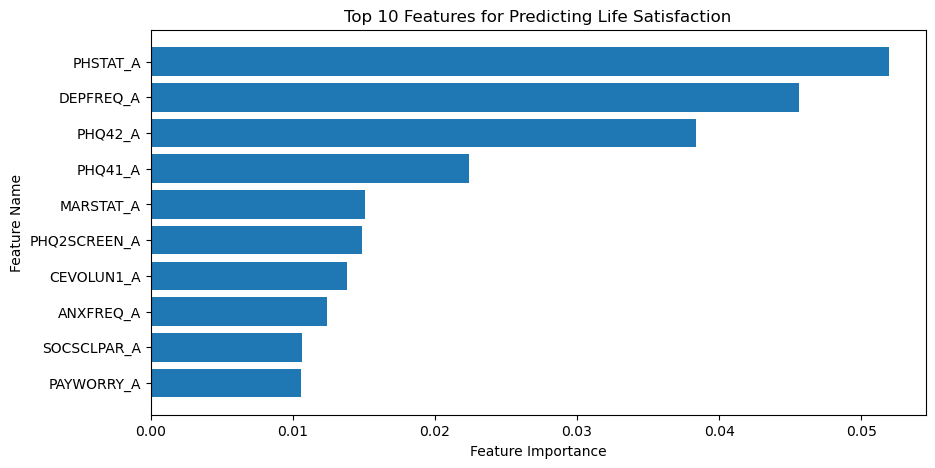

In [ ]:
# Get feature importances from the trained XGBoost model
feature_importances = best_xgb.feature_importances_
feature_names = np.array(X_train_selected.columns)

# Sort features by importance
sorted_indices = np.argsort(feature_importances)[::-1]  # Sort in descending order
top_n = 10  # Change this number to get more/less features

# Select top 10 features
top_features = feature_names[sorted_indices[:top_n]]
top_importances = feature_importances[sorted_indices[:top_n]]

# Create DataFrame for easy viewing
top_features_df = pd.DataFrame({
    'Feature': top_features,
    'Importance': top_importances
})

# Print the top features
print("\n🔹 Top 10 Features for Predicting Life Satisfaction:\n")
print(top_features_df)

# Plot top 10 features
plt.figure(figsize=(10, 5))
plt.barh(top_features[::-1], top_importances[::-1], align="center")
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Top 10 Features for Predicting Life Satisfaction")
plt.show()


100%|===================| 81629/81632 [1469:45<00:03]          

TypeError: only integer scalar arrays can be converted to a scalar index

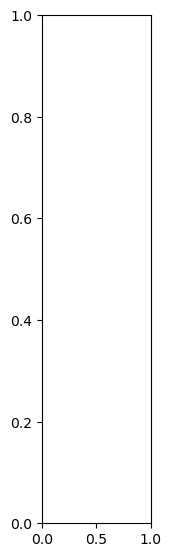

In [ ]:
import shap
import matplotlib.pyplot as plt

# Initialize SHAP explainer with the trained XGBoost model
explainer = shap.Explainer(best_xgb, X_train_selected)

# Compute SHAP values for the training set
shap_values = explainer(X_train_selected)

In [ ]:
import joblib

# Save SHAP values
joblib.dump(shap_values, "shap_values.pkl")

# Reload later without recomputing
shap_values = joblib.load("shap_values.pkl")


In [ ]:
import numpy as np
import joblib
import shap

# Load SHAP values
shap_values = joblib.load("shap_values.pkl")

# Check type and shape
print(f"SHAP Values Type: {type(shap_values)}")
if hasattr(shap_values, "shape"):
    print(f"SHAP Values Shape: {shap_values.shape}")

# If it's an Explanation object, show a sample
if isinstance(shap_values, shap.Explanation):
    print(shap_values)
elif isinstance(shap_values, np.ndarray):
    print(f"SHAP array dimensions: {shap_values.shape}")  # Should match (n_samples, n_features)


SHAP Values Type: <class 'shap._explanation.Explanation'>
SHAP Values Shape: (20408, 154, 4)
.values =
array([[[ 2.60810941e-03, -6.93727849e-03,  3.75845992e-03,
         -6.53048065e-04],
        [-5.28277322e-02,  3.58379482e-02,  1.26848593e-02,
          1.09988874e-02],
        [ 3.89904111e-04, -4.82763530e-04, -1.87847634e-03,
         -9.13940023e-04],
        ...,
        [-1.84558689e-04,  1.28578149e-03,  3.07172908e-04,
          2.28783922e-04],
        [-2.49778866e-01,  2.52848885e-01,  2.34345730e-02,
         -1.72122423e-02],
        [ 1.85458619e-02, -2.52089555e-02,  1.98083185e-02,
          6.93669668e-03]],

       [[ 1.90994163e-03, -5.25928340e-03,  1.05806100e-02,
         -1.98662414e-03],
        [ 2.88008337e-02, -1.15337003e-02, -1.06162520e-02,
         -2.34270330e-02],
        [ 3.55205741e-04, -1.28684059e-03, -5.88584601e-03,
         -1.19829962e-03],
        ...,
        [-5.99807782e-05,  2.82773005e-05, -2.43385537e-03,
          1.21946612e-02],

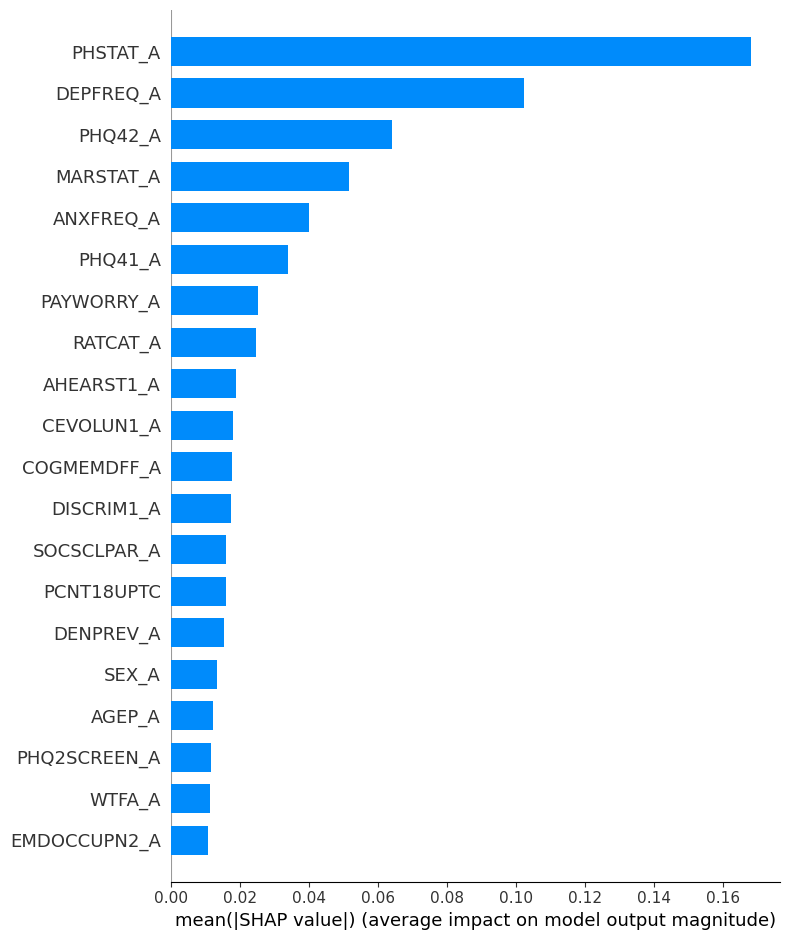

In [ ]:
import numpy as np
import shap
import matplotlib.pyplot as plt

# Compute mean absolute SHAP values across all 4 classes
shap_values_mean = np.mean(np.abs(shap_values.values), axis=2)  # Aggregate across classes

# Now create a SHAP Explanation object with aggregated values
shap_values_aggregated = shap.Explanation(values=shap_values_mean, base_values=None, data=X_train_selected)

# Plot the feature importance summary
shap.summary_plot(shap_values_aggregated, X_train_selected, plot_type="bar")
